In [2]:
using MLDatasets, Images, TestImages

In [3]:
train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata();

In [4]:
size(train_x)

(28, 28, 60000)

In [5]:
size(train_y)

(60000,)

In [6]:
size(train_x[:,:,1])

(28, 28)

In [7]:
X = [reshape(train_x[:,:,i], 784, 1) for i = 1:60000] #X is 60000 column vectors
size(X)

(60000,)

In [8]:
size(reshape(train_x[:,:,1], 784, 1)) #reshapes into a 1d column vector.

(784, 1)

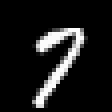

In [9]:
colorview(Gray, train_x[:, :, 10000]')

In [10]:
train_y[10000]

7

In [11]:
#Project!!!!


pocket_train_x = []
pocket_train_y = []
indices = []
for i = 1:60000
    if train_y[i] == 1 || train_y[i] == 5
        push!(pocket_train_x, reshape(train_x[:,:,i], 784))
        push!(pocket_train_y,  train_y[i] == 1 ? 1 : -1)
    end
end
    

In [12]:
size(pocket_train_x[1])

(784,)

In [13]:
w = rand(785)

function sign(w, x)
    x = push!(copy(x), 1.0)
    return w'x > 0 ? 1 : -1
end


function errors(w)
    return sum([sign(w, pocket_train_x[i]) != pocket_train_y[i] ? 1 : 0
            for i = 1:size(pocket_train_x)[1]])
    
end



errors (generic function with 1 method)

In [14]:
function pocket_algorithm(w, T)    
    w_hat = copy(w)
    for i = 1:T
        for j = 1:size(pocket_train_x)[1]
            #println(size(pocket_train_x[j]))
            if sign(w, pocket_train_x[j]) != pocket_train_y[j]  
                w += pocket_train_y[j] * push!(copy(pocket_train_x[j]),1.0)
                if errors(w) < errors(w_hat)
                    w_hat = copy(w)
                end
            end
        end
    end
    return w_hat
end
    

pocket_algorithm (generic function with 1 method)

In [15]:
errors(w)

5421

In [16]:
w = rand(785)
w_new = pocket_algorithm(w,10)

785-element Array{Float64,1}:
  0.6512252899636357  
  0.22143867124890293 
  0.14262850901800772 
  0.7047116969202387  
  0.021466608165746193
  0.19158568189566627 
  0.44114562661636003 
  0.46318258856874683 
  0.3288680097302379  
  0.6982471535022572  
  0.8999517542268287  
  0.60133068066169    
  0.39134893800422876 
  ⋮                   
  0.43444414556238997 
  0.7464988379593198  
  0.8147008942432197  
  0.1855871966416025  
  0.7953754381282592  
  0.09691313155459436 
  0.6230051416492319  
  0.26252701683141666 
  0.04628676588658043 
  0.14671224056100263 
  0.30589989806941786 
 -8.216773629273199   

In [17]:
sign(w_new, pocket_train_x[1]) # we know this is a 5 (-1)

-1

In [18]:
function check_value(i)
    println("The predicted value is")
    println(sign(w_new, reshape(test_x[:,:,indices[i][1]], 784)) == 1 ? 1 : 5)
    colorview(Gray, test_x[:,:,indices[i][1]]')
end
#[reshape(train_x[:,:,i], 784, 1) for i = 1:60000]

check_value (generic function with 1 method)

In [19]:
check_value(6)

The predicted value is


BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [6]

In [20]:
indices

0-element Array{Any,1}

In [21]:
indices = []
for i in 1:size(test_y)[1]
    if test_y[i] == 1 || test_y[i] == 5
        push!(indices, (i,test_y[i]))
    end
end

The predicted value is
1


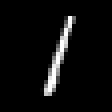

In [22]:
println("The predicted value is")
println(sign(w_new, reshape(test_x[:,:,3], 784)) == 1 ? 1 : 5)
colorview(Gray, test_x[:,:,3]')